In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kmeans import k_means

In [2]:
%matplotlib notebook

## Read Data

In [3]:
#load data, drop the name, episodes, and members
## Read data
data_path = './data./'
anime = pd.read_csv(os.path.join(data_path,'anime_cleaned.csv')).drop(['anime_id', 'name'], axis=1) #keep genre
#rating = pd.read_csv('rating_cleaned.csv')

test_list = list(anime.columns)
test_string = 'type'
res = [ele for ele in test_list if(test_string in ele)]

print(res)

anime = anime.drop(res, axis=1)


rating = pd.read_csv(os.path.join(data_path,'rating_cleaned.csv'))
rating_derek = pd.read_csv(os.path.join(data_path,'rating_derek.csv'))
rating_fei = pd.read_csv(os.path.join(data_path,'rating_fei.csv'))
rating_sun = pd.read_csv(os.path.join(data_path,'rating_sun.csv'))



rating_miko = pd.read_csv(os.path.join(data_path,'rating_miko.csv'))



#read dataset with names
animeWithName = pd.read_csv(os.path.join(data_path, 'anime_cleaned.csv'))

['type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special', 'type_TV']


In [4]:
anime


,episodes,rating,members,genre_Drama,genre_Romance,genre_School,genre_Supernatural,genre_Action,genre_Adventure,genre_Fantasy,...,genre_Josei,genre_ShounenAi,genre_Game,genre_Dementia,genre_Harem,genre_Cars,genre_Kids,genre_ShoujoAi,genre_Yaoi,genre_Yuri
0,0.000000,0.924370,0.197867,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.034673,0.911164,0.782769,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027518,0.909964,0.112683,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012658,0.900360,0.664323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027518,0.899160,0.149180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0.000000,0.486194,0.004901,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10252,0.001101,0.481393,0.005163,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10253,0.000000,0.434574,0.003316,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10254,0.000550,0.427371,0.004476,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Hyperparameters

In [5]:
n_clusters = 15
good_rating_threshold = 5

## Creat dataset

In [6]:
animeData = np.array(anime).astype(int)

(44, 44)


<IPython.core.display.Javascript object>


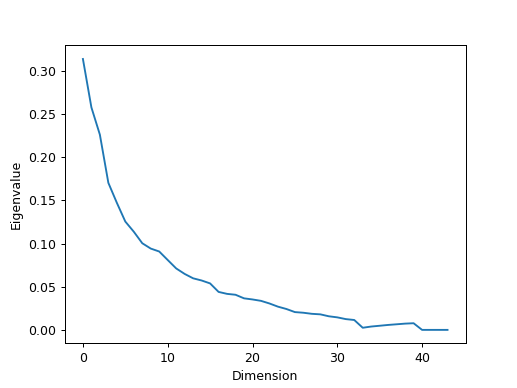

Text(0, 0.5, 'Eigenvalue')

In [7]:
## Visualize PCA-explained variance ratio
animeData_cov = np.cov(np.transpose(animeData))
print(animeData_cov.shape)
eigenvalues, eigenvectors = np.linalg.eig(animeData_cov)
plt.plot(eigenvalues)
plt.xlabel('Dimension')
plt.ylabel('Eigenvalue')

## PCA 
### Reduce to 3-dimension

In [9]:
pca = PCA(n_components = 3,random_state = 10 )
pca.fit(animeData[:,1:len(animeData)-4])
pca_samples = pca.transform(animeData[:,1:len(animeData)-4])
print(pca_samples)
tocluster = pd.DataFrame(pca_samples)
tocluster

[[-0.20346923 -0.73192119 -0.32973377]
 [ 1.18256814  0.35893781  0.75052525]
 [ 0.53181696  0.92127083 -0.74848394]
 ...
 [ 0.89565592 -0.11784548 -0.46860296]
 [-0.10698175 -0.77698169 -0.21807352]
 [-0.12186864 -0.43454811 -0.01384941]]


,0,1,2
0,-0.203469,-0.731921,-0.329734
1,1.182568,0.358938,0.750525
2,0.531817,0.921271,-0.748484
3,0.295102,-0.348046,-0.336402
4,0.531817,0.921271,-0.748484
...,...,...,...
10251,-0.339034,-1.015286,-0.350959
10252,0.929017,-0.134667,-0.575755
10253,0.895656,-0.117845,-0.468603
10254,-0.106982,-0.776982,-0.218074


In [10]:
print('PCA explained variance ratio: ', sum(pca.explained_variance_ratio_))

PCA explained variance ratio:  0.3173135305118049


## K-means or EM

In [11]:
## K-means
#
#clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(tocluster)
#centers = clusterer.cluster_centers_
#c_preds = clusterer.predict(tocluster)

c_preds,centers = k_means(pca_samples,n_clusters)
centers = np.array(centers)

## EM
#clusterer = GaussianMixture(n_components=n_clusters, random_state=None).fit(tocluster)
#centers = clusterer.means_
#c_preds = clusterer.predict(tocluster)


for i in centers:
 print(i)

plt.rcParams['figure.figsize'] = (9, 7)
 

[-0.17152269 -0.60405723  0.01270753]
[0.91344529 0.35544876 0.73860444]
[ 0.65534934  0.86130577 -0.65352689]
[ 0.41708995 -0.27081328 -0.28059374]
[-0.67618982  0.27507854 -0.28296094]
[ 1.13699374  0.28429823 -0.08663568]
[ 1.02303043 -0.13502441 -0.64649364]
[ 0.43472054 -0.08555142  0.34839823]
[0.30482494 0.03873445 1.11343591]
[-0.04918654 -0.3351903   0.74120794]
[-0.03425716  0.57541481 -0.50008844]
[-0.31489885  0.60640383  0.2848758 ]
[0.46677288 1.17654231 0.20705246]
[-0.38786673  0.58728224  0.88438017]
[0.12557571 1.00453791 0.84476656]


<IPython.core.display.Javascript object>


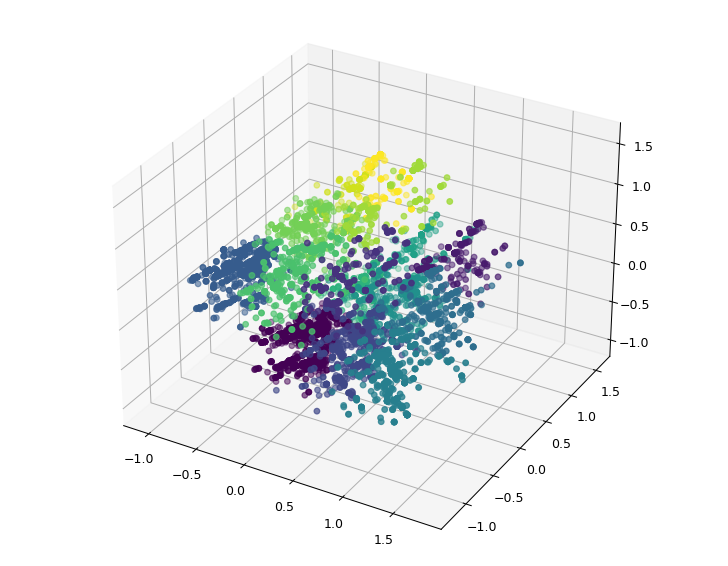

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=10)
plt.show()

 ## Regenerate Centers with Anime Names

In [42]:
#assign each anime with its cluster
animeWithName['cluster centers'] = c_preds
animeWithName['pca_x'] = tocluster[0]
animeWithName['pca_y'] = tocluster[1]
animeWithName['pca_z'] = tocluster[2]

In [43]:
#define function to view a cluster dedicatly
def clusterView(df):
    colNames = [column for column in df]
    #only read the genre of animes
    genreNames = colNames[5:len(colNames) - 8]#only count genre
    genreDict = {}
    nameDict = {}
    #create empty dict for cols
    for i in genreNames:
        genreDict [i] = 0
    for i in genreNames:
        genreScore = np.sum(df[i])
        genreDict [i] = genreScore
    #sort the map
    genreSort = sorted(genreDict.items(), key = lambda kv:(kv[1], kv[0]))
    print("liked genres and appeared time:")
    for i in reversed(genreSort):
        print(i)    
    
    return reversed(genreSort)       

In [44]:
def pickTopAnime(df,usercenter):
    #get the center
    center = df['cluster centers']
    clusterCenter = centers[center - 1]
    #choose the nearest datapoint
    pcaPoints = df[['pca_x','pca_y','pca_z']]
    
    distances = [] 
    ####take center as usercenter
    center = np.array(usercenter)
    pcas = np.array(pcaPoints)
   
    distances = np.sum(np.square(center-pcas),1) 
    listDistances = distances.tolist()
    
    topAnime = {}
    
    for i in range(len(listDistances)):
        topAnime[df.iloc[i,1]] = (listDistances[i])
      
     
    animeSort =  sorted(topAnime.items(), key = lambda kv:(kv[1], kv[0]))
    #print( animeSort)
    return animeSort
    

In [45]:
 def getMean(userid, rating, anime):
    user = rating.loc[rating['user_id']==userid]
    mean = np.mean(user['rating'])
    
    animeLike = np.array(user.loc[user['rating'] > mean]['anime_id'])
    #animeLike = np.array(user.loc[user['rating'] > good_rating_threshold]['anime_id'])
    
    x = 0.0
    y = 0.0
    z = 0.0
    count = 0
    print(animeLike)
    for i in animeLike:
        try:
            temp = anime.loc[anime['anime_id'] == i]
            #print(count)
        except:
            continue
        count += 1
        x += float(temp['pca_x'])
        y += float(temp['pca_y'])
        z += float(temp['pca_z'])
    return [x/count,y/count,z/count]

In [46]:
def recommand(mean, centers):
    shortest = 10000.0
    idx = 0
    for c in range(len(centers)):
        distance = np.sqrt(np.sum((np.array(centers[c]) - np.array(mean))**2))
        if distance < shortest:
            shortest = distance
            idx = c
    return idx

 ## Recommendation system test out

In [51]:
#allocating clusters:
animeClusters = []
genreScores = []
topAnimes = []
for i in range(n_clusters):
    animeClusters.append(animeWithName.loc[animeWithName['cluster centers']==i])

#usermean = getMean(11, rating, animeWithName)
usermean_miko = getMean(-10, rating_miko, animeWithName)
usermean_fei = getMean(-6, rating_fei, animeWithName)
usermean_sun = getMean(-11, rating_sun, animeWithName)

#determin which user we are going to take
usermean = usermean_sun

print("the user mean are: ", usermean)
index = recommand(usermean, centers)
print("choosing clustering #", index)

[1096 1288 1080]
[ 9756 16049  6213 30276  6336]
[  121 31240    20 26055 23847 32182  9253]
the user mean are:  [0.19705093560372347, 0.2517506356709057, -0.09335061344116437]
choosing clustering # 9


In [52]:
print(clusterView(animeClusters[index]))

liked genres and appeared time:
('genre_Comedy', 459.0)
('genre_Sci-Fi', 244.0)
('genre_Action', 233.0)
('genre_Shounen', 127.0)
('genre_Romance', 66.0)
('type_Movie', 65)
('genre_School', 64.0)
('genre_Drama', 55.0)
('genre_Mecha', 46.0)
('genre_Parody', 41.0)
('genre_Sports', 35.0)
('genre_Mystery', 34.0)
('genre_Seinen', 31.0)
('genre_Police', 30.0)
('genre_SuperPower', 29.0)
('genre_Space', 28.0)
('genre_Supernatural', 26.0)
('genre_Military', 22.0)
('genre_SliceofLife', 21.0)
('genre_Magic', 21.0)
('genre_Historical', 18.0)
('genre_MartialArts', 17.0)
('genre_Harem', 13.0)
('genre_Samurai', 12.0)
('genre_Adventure', 12.0)
('genre_Shoujo', 8.0)
('genre_Horror', 7.0)
('genre_Demons', 6.0)
('genre_Vampire', 4.0)
('genre_Thriller', 3.0)
('genre_ShoujoAi', 3.0)
('genre_Psychological', 2.0)
('genre_Music', 2.0)
('genre_Kids', 2.0)
('genre_Cars', 2.0)
('genre_Josei', 1.0)
('genre_Fantasy', 1.0)
('genre_Dementia', 1.0)
('type_Music', 0)
('genre_Yuri', 0.0)
('genre_Yaoi', 0.0)
('genre_Shou

In [53]:
rec_list = pickTopAnime(animeClusters[index],usermean)
print("top pick for the user is: ", rec_list[0][0])

top pick for the user is:  Dennou Coil


In [54]:
rec_list

[('Dennou Coil', 0.05097693728237025),
 ('Dennou Coil Recaps', 0.05097693728237025),
 ('Mai-HiME', 0.05950311328713805),
 ('Kurenai no Buta', 0.0626538739384591),
 ('Mahou Shoujo Lyrical Nanoha', 0.10918864463111769),
 ('Mahou Shoujo Lyrical Nanoha A&#039;s', 0.10918864463111769),
 ('Mahou Shoujo Lyrical Nanoha StrikerS', 0.10918864463111769),
 ('Mahou Shoujo Lyrical Nanoha: The Movie 1st', 0.10918864463111769),
 ('Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 0.10918864463111769),
 ('Koutetsu Tenshi Kurumi', 0.11480798126946763),
 ('Musekinin Kanchou Tylor OVA', 0.13108133063412722),
 ('Fushigi no Umi no Nadia', 0.1337105400260599),
 ('Chikyuu SOS Sore Ike Kororin', 0.13912323801315207),
 ('Rozen Maiden', 0.14033554668246534),
 ('Rozen Maiden (2013)', 0.14033554668246534),
 ('Rozen Maiden: Ouvertüre', 0.14033554668246534),
 ('Rozen Maiden: Träumend', 0.14033554668246534),
 ('Fruity Samurai', 0.14152552370281016),
 ('Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Yuushi The Anima